In [217]:
import unicodecsv

with open('./datasets/enrollments.csv', 'rb') as f:
    reader = unicodecsv.DictReader(f)
    enrollments = list(reader)

In [218]:
def read_csv(filename):
    with open(filename, 'rb') as f:
        reader = unicodecsv.DictReader(f)
        return list(reader)

enrollments_filename = './datasets/enrollments.csv'
engagement_filename = './datasets/daily_engagement.csv'
submissions_filename = './datasets/project_submissions.csv'

daily_engagement = read_csv(engagement_filename)     # Replace this with your code
project_submissions =  read_csv(submissions_filename)    # Replace this with your code

print daily_engagement[0]
project_submissions[0]


{u'lessons_completed': u'0.0', u'num_courses_visited': u'1.0', u'total_minutes_visited': u'11.6793745', u'projects_completed': u'0.0', u'acct': u'0', u'utc_date': u'2015-01-09'}


{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': u'2015-01-16',
 u'creation_date': u'2015-01-14',
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [219]:
from datetime import datetime as dt

def parse_date(date):
    if date == '':
        return None
    else:
        return dt.strptime(date, '%Y-%m-%d')

def parse_maybe_int(i):
    if i == '':
        return None
    else:
        return int(i)

# Clean up the data types in the enrollments table
for enrollment in enrollments:
    enrollment['cancel_date'] = parse_date(enrollment['cancel_date'])
    enrollment['days_to_cancel'] = parse_maybe_int(enrollment['days_to_cancel'])
    enrollment['is_canceled'] = enrollment['is_canceled'] == 'True'
    enrollment['is_udacity'] = enrollment['is_udacity'] == 'True'
    enrollment['join_date'] = parse_date(enrollment['join_date'])
    
enrollments[0]



{u'account_key': u'448',
 u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'days_to_cancel': 65,
 u'is_canceled': True,
 u'is_udacity': True,
 u'join_date': datetime.datetime(2014, 11, 10, 0, 0),
 u'status': u'canceled'}

In [220]:
# Clean up the data types in the engagement table
for engagement_record in daily_engagement:
    engagement_record['lessons_completed'] = int(float(engagement_record['lessons_completed']))
    engagement_record['num_courses_visited'] = int(float(engagement_record['num_courses_visited']))
    engagement_record['projects_completed'] = int(float(engagement_record['projects_completed']))
    engagement_record['total_minutes_visited'] = float(engagement_record['total_minutes_visited'])
    engagement_record['utc_date'] = parse_date(engagement_record['utc_date'])
    
daily_engagement[0]

{u'acct': u'0',
 u'lessons_completed': 0,
 u'num_courses_visited': 1,
 u'projects_completed': 0,
 u'total_minutes_visited': 11.6793745,
 u'utc_date': datetime.datetime(2015, 1, 9, 0, 0)}

In [221]:
# Clean up the data types in the submissions table
for submission in project_submissions:
    submission['completion_date'] = parse_date(submission['completion_date'])
    submission['creation_date'] = parse_date(submission['creation_date'])

project_submissions[0]

{u'account_key': u'256',
 u'assigned_rating': u'UNGRADED',
 u'completion_date': datetime.datetime(2015, 1, 16, 0, 0),
 u'creation_date': datetime.datetime(2015, 1, 14, 0, 0),
 u'lesson_key': u'3176718735',
 u'processing_state': u'EVALUATED'}

In [222]:
for ne in daily_engagement:
    ne['account_key'] = ne['acct']
    del[ne['acct']]

daily_engagement[0]['account_key']



u'0'

In [223]:
def get_unique_students(data): 
    unique_students = set() 
    for data_point in data: 
        unique_students.add(data_point['account_key']) 
    return unique_students





In [224]:
print len(enrollments) 
unique_enrolled_students = get_unique_students(enrollments) 
len(unique_enrolled_students) 

1640


1302

In [225]:
len(daily_engagement) 
unique_engagement_students = get_unique_students(daily_engagement) 
len(unique_engagement_students) 

1237

In [226]:

len(project_submissions) 
unique_project_submitters = get_unique_students(project_submissions) 
len(unique_project_submitters)

743

In [227]:
for enrollment in enrollments:
    student = enrollment['account_key']
    if student not in unique_engagement_students:
        print enrollment
        break

{u'status': u'canceled', u'is_udacity': False, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 12, 0, 0), u'account_key': u'1219', u'cancel_date': datetime.datetime(2014, 11, 12, 0, 0), u'days_to_cancel': 0}


In [228]:
num_problem_students = 0
for enrollment in enrollments:
    student = enrollment['account_key']
    if (student not in unique_engagement_students and 
            enrollment['join_date'] != enrollment['cancel_date']):
        print enrollment
        num_problem_students += 1

num_problem_students

{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 1, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 3, 10, 0, 0), u'days_to_cancel': 59}
{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2015, 3, 10, 0, 0), u'account_key': u'1304', u'cancel_date': datetime.datetime(2015, 6, 17, 0, 0), u'days_to_cancel': 99}
{u'status': u'current', u'is_udacity': True, u'is_canceled': False, u'join_date': datetime.datetime(2015, 2, 25, 0, 0), u'account_key': u'1101', u'cancel_date': None, u'days_to_cancel': None}


3

In [229]:
udacity_test_accounts = set()
for enrollment in enrollments:
    if enrollment['is_udacity']=='True':
        udacity_test_accounts.add(enrollment['account_key'])
len(udacity_test_accounts)

0

In [230]:
def remove_udacity_accounts(data):
    non_udacity_data=[]
    for data_point in data:
        if data_point['account_key'] not in udacity_test_accounts:
            non_udacity_data.append(data_point)
    return non_udacity_data

In [231]:
non_udacity_enrollments = remove_udacity_accounts(enrollments)
non_udacity_engagement = remove_udacity_accounts(daily_engagement)
non_udacity_submissions = remove_udacity_accounts(project_submissions)
print non_udacity_enrollments[0]
print len(non_udacity_enrollments)
print len(non_udacity_engagement)
print len(non_udacity_submissions)


{u'status': u'canceled', u'is_udacity': True, u'is_canceled': True, u'join_date': datetime.datetime(2014, 11, 10, 0, 0), u'account_key': u'448', u'cancel_date': datetime.datetime(2015, 1, 14, 0, 0), u'days_to_cancel': 65}
1640
136240
3642


In [233]:
paid_students = {}
for enrollment in non_udacity_enrollments:
    if (not enrollment['is_canceled'] or
            enrollment['days_to_cancel'] > 7):
        account_key = enrollment['account_key']
        enrollment_date = enrollment['join_date']
        if (account_key not in paid_students or
                enrollment_date > paid_students[account_key]):
            paid_students[account_key] = enrollment_date
len(paid_students)

999

In [ ]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

In [234]:
def within_one_week(join_date, engagement_date):
    time_delta = engagement_date - join_date
    return time_delta.days < 7

def remove_free_trial_cancels(data):
    new_data = []
    for data_point in data:
        if data_point['account_key'] in paid_students:
            new_data.append(data_point)
    return new_data

paid_enrollments = remove_free_trial_cancels(non_udacity_enrollments)
paid_engagement = remove_free_trial_cancels(non_udacity_engagement)
paid_submissions = remove_free_trial_cancels(non_udacity_submissions)

print len(paid_enrollments)
print len(paid_engagement)
print len(paid_submissions)

paid_engagement_in_first_week = []
for engagement_record in paid_engagement:
    account_key = engagement_record['account_key']
    join_date = paid_students[account_key]
    engagement_record_date = engagement_record['utc_date']

    if within_one_week(join_date, engagement_record_date):
        paid_engagement_in_first_week.append(engagement_record)

len(paid_engagement_in_first_week)

1309
135128
3626


21881

In [244]:
#####################################
#                 6                 #
#####################################


paid_students = {}
paid_submission = []
paid_engagement = []
paid_enrollment = []
for student in non_udacity_enrollments:
    if student['days_to_cancel'] is None or student['days_to_cancel'] > 7:
        if student['account_key'] not in paid_students or student['join_date'] > paid_students[student['account_key']]:
            paid_students[student['account_key']] = student['join_date']

for enrollment in non_udacity_enrollments:
    student = enrollment['account_key']
    if student in paid_students:
        paid_enrollment.append(enrollment)
        
for submission in non_udacity_submissions:
    student = submission['account_key']
    if student in paid_students:
        paid_submission.append(submission)
        
for engagement in non_udacity_engagement:
    student = engagement['account_key']
    if student in paid_students:
        paid_engagement.append(engagement)

print len(paid_enrollment)
print len(paid_engagement)
print len(paid_submission)

1309
135128
3626


In [245]:
from collections import defaultdict
engagement_by_account = defaultdict(list)
for engagement_record in paid_engagement_in_first_week:
    account_key = engagement_record['account_key']
    engagement_by_account[account_key].append(engagement_record)

In [246]:
total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

In [247]:
import numpy as np

total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

Mean: 651.627314264
Standard deviation: 1134.41820559
Minimum: 0.0
Maximum: 10568.1008673


In [248]:
#####################################
#                 8                 #
#####################################

problem_time = 0
problem_student = 0
for student, total_minutes in total_minutes_by_account.items():
    if total_minutes > problem_time:
        problem_time = total_minutes
        problem_student = student
print problem_time
print problem_student

total_minutes_by_account = {}
for account_key, engagement_for_student in engagement_by_account.items():
    total_minutes = 0
    for engagement_record in engagement_for_student:
        delta = engagement_record['utc_date'] - paid_students[account_key]
        if delta.days >= 0:
            total_minutes += engagement_record['total_minutes_visited']
    total_minutes_by_account[account_key] = total_minutes

total_minutes = total_minutes_by_account.values()
print 'Mean:', np.mean(total_minutes)
print 'Standard deviation:', np.std(total_minutes)
print 'Minimum:', np.min(total_minutes)
print 'Maximum:', np.max(total_minutes)

10568.1008673
108
Mean: 306.179091737
Standard deviation: 412.755789151
Minimum: 0.0
Maximum: 3564.7332645


In [249]:
#####################################
#                 9                 #
#####################################
def find_total(data, key):
    total_by_account = {}
    for account_key, engagement_for_student in data.items():
        total = 0
        for engagement_record in engagement_for_student:
            delta = engagement_record['utc_date'] - paid_students[account_key]
            if delta.days >= 0:
                total += engagement_record[key]
        total_by_account[account_key] = total
    return total_by_account

total_lessons_by_account = find_total(engagement_by_account,'lessons_completed')
total_lessons = total_lessons_by_account.values()
print 'Mean:', np.mean(total_lessons)
print 'Standard deviation:', np.std(total_lessons)
print 'Minimum:', np.min(total_lessons)
print 'Maximum:', np.max(total_lessons)

Mean: 1.63289869609
Standard deviation: 3.00044144575
Minimum: 0
Maximum: 36


In [250]:

######################################
#                 10                 #
######################################

for engagement in non_udacity_engagement:
    if engagement['num_courses_visited'] > 0:
        engagement['has_visited'] = 1
    else:
        engagement['has_visited'] = 0
        
total_days_by_account = find_total(engagement_by_account, 'has_visited')
total_days = total_days_by_account.values()
print 'Mean:', np.mean(total_days)
print 'Standard deviation:', np.std(total_days)
print 'Minimum:', np.min(total_days)
print 'Maximum:', np.max(total_days)

Mean: 2.86459378134
Standard deviation: 2.25476652377
Minimum: 0
Maximum: 7


In [251]:
######################################
#                 11                 #
######################################

subway_project_lesson_keys = ['746169184', '3176718735']

passing_engagement = []
non_passing_engagement = []

passed_student = set()
for submission in paid_submission:
    rating = submission['assigned_rating']
    lesson = submission['lesson_key']
    student = submission['account_key']
    if lesson in subway_project_lesson_keys and rating in ['PASSED', 'DISTINCTION']:
        passed_student.add(student)
        
for engagement in paid_engagement_in_first_week:
    student = engagement['account_key']
    if student in passed_student:
        passing_engagement.append(engagement)
    else:
        non_passing_engagement.append(engagement)

print len(passed_student)
print len(passing_engagement)
print len(non_passing_engagement)

649
15604
6277


In [253]:
######################################
#                 12                 #
######################################
def group_data(data):
    data_by_account = defaultdict(list)
    for data_point in data:
        account_key = data_point['account_key']
        data_by_account[account_key].append(data_point)
    return data_by_account

passing_engagement_by_account = group_data(passing_engagement)
non_passing_engagement_by_account = group_data(non_passing_engagement)

def print_statistics(data, key):
    total_data_by_account = find_total(data, key)
    total = total_data_by_account.values()
    print 'Mean:', np.mean(total)
    print 'Standard deviation:', np.std(total)
    print 'Minimum:', np.min(total)
    print 'Maximum:', np.max(total)

print "===Passing Engagement==="
print_statistics(passing_engagement_by_account, 'total_minutes_visited')
print "===Non Passing Engagement==="
print_statistics(non_passing_engagement_by_account, 'total_minutes_visited')

===Passing Engagement===
Mean: 393.502220982
Standard deviation: 448.238343086
Minimum: 0.0
Maximum: 3564.7332645
===Non Passing Engagement===
Mean: 143.326474267
Standard deviation: 269.538619011
Minimum: 0.0
Maximum: 1768.52274933


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


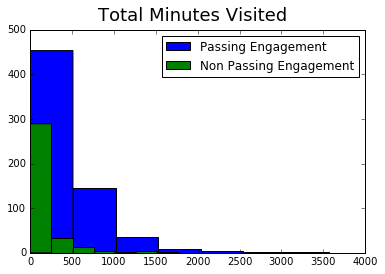

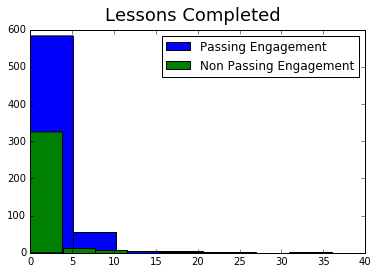

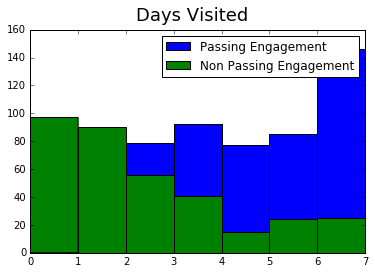

In [254]:

######################################
#                 13                 #
######################################

%pylab inline
import matplotlib.pyplot as plt
def print_histogram(data, key, label):
    total_data_by_account = find_total(data, key)
    total = total_data_by_account.values()
    plt.hist(total, bins=7, label=label)
    plt.legend()

plt.figure()
plt.suptitle('Total Minutes Visited', fontsize=18)
print_histogram(passing_engagement_by_account, 'total_minutes_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'total_minutes_visited', 'Non Passing Engagement')
plt.figure()
plt.suptitle('Lessons Completed', fontsize=18)
print_histogram(passing_engagement_by_account, 'lessons_completed', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'lessons_completed', 'Non Passing Engagement')
plt.figure()
plt.suptitle('Days Visited', fontsize=18)
print_histogram(passing_engagement_by_account, 'has_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'has_visited', 'Non Passing Engagement')

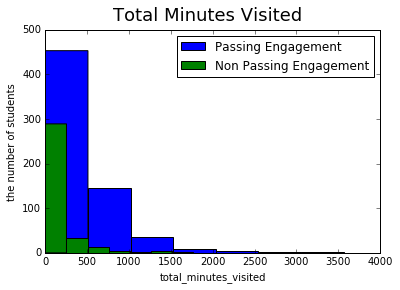

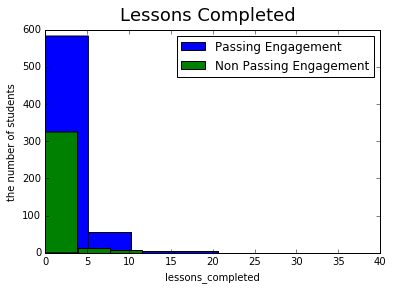

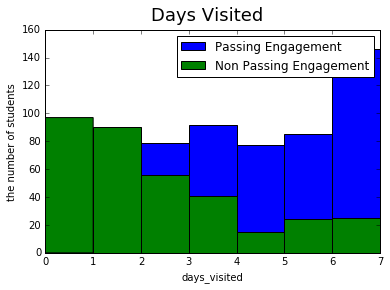

In [255]:
######################################
#                 14                 #
######################################

plt.figure()
plt.suptitle('Total Minutes Visited', fontsize=18)
plt.xlabel("total_minutes_visited")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'total_minutes_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'total_minutes_visited', 'Non Passing Engagement')

plt.figure()
plt.suptitle('Lessons Completed', fontsize=18)
plt.xlabel("lessons_completed")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'lessons_completed', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'lessons_completed', 'Non Passing Engagement')

plt.figure()
plt.suptitle('Days Visited', fontsize=18)
plt.xlabel("days_visited")
plt.ylabel("the number of students")
print_histogram(passing_engagement_by_account, 'has_visited', 'Passing Engagement')
print_histogram(non_passing_engagement_by_account, 'has_visited', 'Non Passing Engagement')